## Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Processing

In [3]:
# Loading and reading the dataset
df = pd.read_csv(r'C:\Users\USER\Documents\car data analysis\car data.csv', encoding= 'unicode_escape')

In [5]:
# inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# checking the number of rows and columns
df.shape

(301, 9)

In [7]:
# checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encoding the Categorical Data

In [11]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the data and Target

In [13]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [14]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting Training and Test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## Model Training

In [17]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [19]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370215


## Visualize the actual prices and Predicted prices

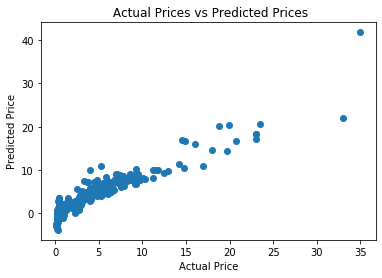

In [21]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [22]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [23]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

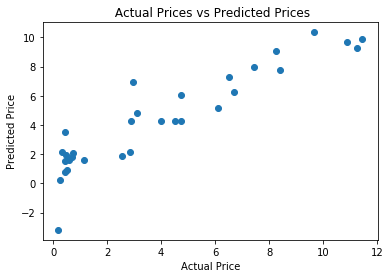

In [24]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [25]:
# loading the linear regression model
lass_reg_model = Lasso()

In [26]:
lass_reg_model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.842448071824074


## Visualize the actual prices and Predicted prices

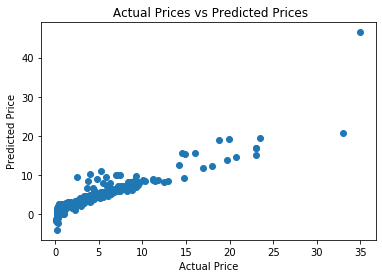

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [31]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709763132343395


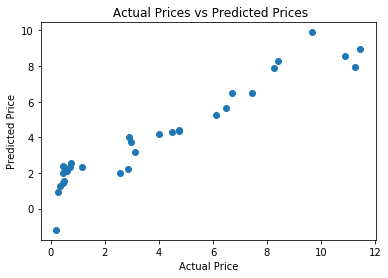

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [34]:
conda uninstall pandas

Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are missing from the target environment:
  - pandas




In [35]:
conda install -c conda-forge pandas=0.24

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\USER\Anaconda3

  added / updated specs:
    - pandas=0.24


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    google-pasta-0.2.0         |     pyh8c360ce_0          42 KB  conda-forge
    matplotlib-base-3.2.2      |   py37hab8957c_1         7.0 MB  conda-forge
    mkl_fft-1.0.14             |   py37h6288b17_0         155 KB
    mkl_random-1.0.4           |   py37h343c172_0         287 KB
    numpy-1.17.0               |   py37h19fb1c0_0          25 KB
    numpy-base-1.17.0          |   py37hc3f5095_0         4.8 MB
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    pandas-0.24.0              |   py37h6538335_0  


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==custom=py37_1
  - defaults/win-64::astropy==3.2.1=py37he774522_0
  - defaults/win-64::bkcharts==0.2=py37_0
  - defaults/win-64::blaze==0.11.3=py37_0
  - defaults/win-64::bokeh==1.2.0=py37_0
  - defaults/win-64::bottleneck==1.2.1=py37h452e1ab_1
  - defaults/noarch::dask==2.1.0=py_0
  - defaults/win-64::datashape==0.5.4=py37haa95532_1
  - defaults/win-64::h5py==2.9.0=py37h5e291fa_0
  - defaults/win-64::imageio==2.5.0=py37_0
  - defaults/win-64::keras==2.3.1=0
  - defaults/noarch::keras-applications==1.0.8=py_1
  - defaults/win-64::keras-base==2.3.1=py37_0
  - defaults/win-64::keras-gpu==2.3.1=0
  - defaults/noarch::keras-preprocessing==1.1.2=pyhd3eb1b0_0
  - defaults/win-64::matplotlib==3.1.0=py37hc8f65d3_0
  - defaults/win-64::mkl-service==2.0.2=py37he774522_0
  - defaults/win-64::mkl_fft==1.0.12=py37h14836fe_0
  - defaults/win-6